# Init
- - -

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns #Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지, 약간 요소들간의 연관성을 비교하고자 할때 편리한듯?
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Input, Model
from tensorflow.keras import Sequential
from tensorflow.keras.applications import resnet_v2
from keras.backend import int_shape
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import *


from sklearn.model_selection import ShuffleSplit


<br/>

# 데이터 분석
- - -

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/train.csv')
label = train['Target']
train.drop(['id'], axis=1, inplace=True)


test = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/test.csv')
test.drop(['id'], axis=1, inplace=True)

In [ ]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [ ]:
print("train shape : ",train.shape)
print("label shape : ",label.shape)
print("test shape : ",test.shape)
print()
print("---------------[ Train Info ]--------------- ")
print(train.info())
print("---------------[ Test Info ]--------------- ")
print(test.info())

train shape :  (1253, 9)
label shape :  (1253,)
test shape :  (2924, 8)

---------------[ Train Info ]--------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB
None
---------------[ Test Info ]--------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------     

In [ ]:
print("-------------[ Train NULL Info ]------------- ")
print(train.isnull().sum())
print("--------------[ Test NULL Info ]------------- ")
print(test.isnull().sum())

-------------[ Train NULL Info ]------------- 
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64
--------------[ Test NULL Info ]------------- 
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64


Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


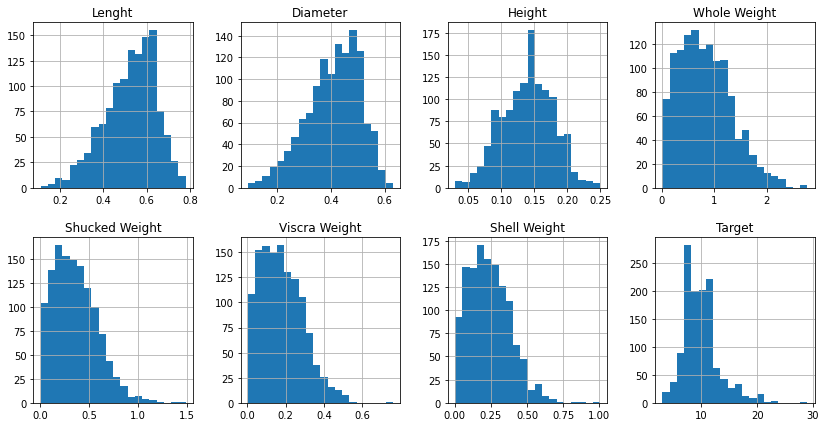

In [ ]:
plot_cols_list = train.columns[1:]
print(plot_cols_list)

train[plot_cols_list].hist(figsize=(14,7), grid = True, layout = (2,4), bins = 20)
plt.show()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


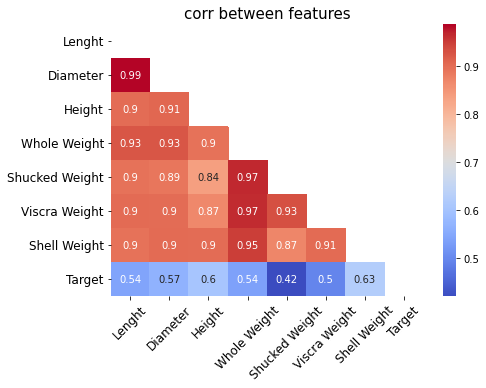

In [ ]:
def corr_heat(df):
    plt.figure(figsize=(7,5))

    corr_df = df.corr()
    display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()
    
corr_heat(train[plot_cols_list])

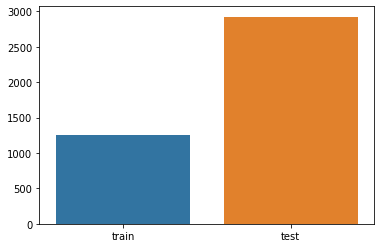

In [ ]:
x = ["train", "test"]
y = [train.shape[0], test.shape[0]]
ax = sns.barplot(x=x, y=y)

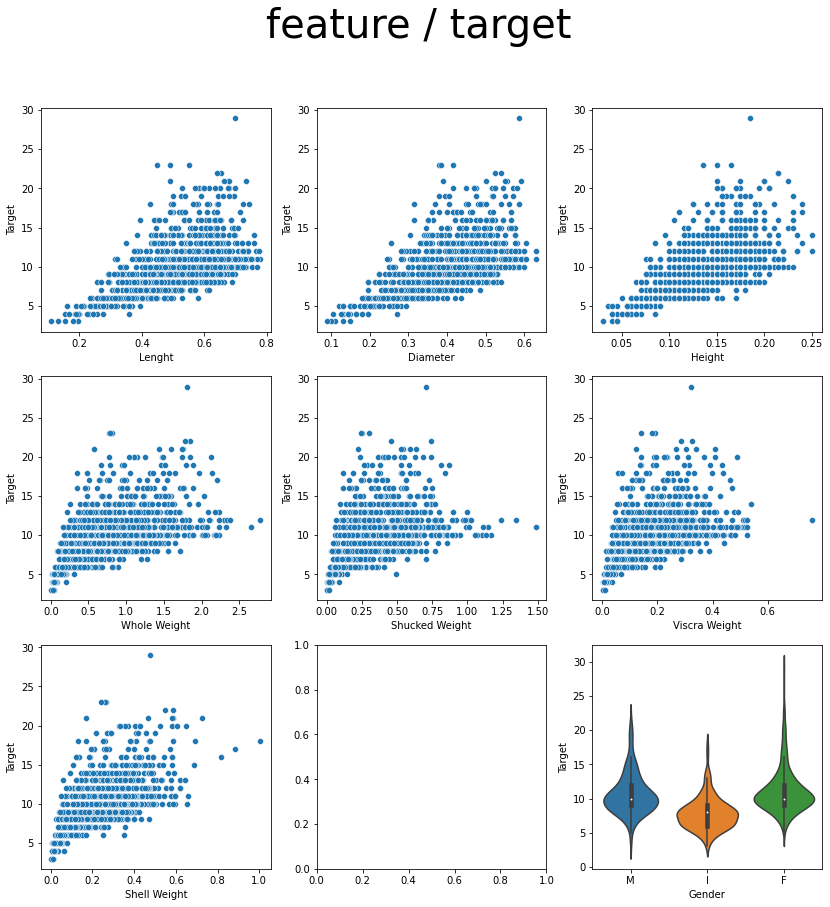

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = train)
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = train, ax = (ax[yvalue][xvalue]))
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

<br/>

# 데이터 전처리
- - -

## 이상치 제거

In [ ]:
train[train["Viscra Weight"] >0.6]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
504,M,0.775,0.63,0.25,2.7795,1.3485,0.76,0.578,12


In [ ]:
train[train["Whole Weight"] > 2.5]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
312,F,0.780,0.63,0.215,2.6570,1.4880,0.4985,0.586,11
504,M,0.775,0.63,0.250,2.7795,1.3485,0.7600,0.578,12


In [ ]:
train = train.drop(index = [504], axis = 0)
label = label.drop(index = [504], axis = 0)

In [ ]:
# 이상치 인데스 확인
train[train["Target"]>20]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [ ]:
# 이상치 제거
train = train.drop(index = [762], axis = 0)
label = label.drop(index = [762], axis = 0)

In [ ]:
# 전복 전체무게가 전복 무게 + 껍질 무게 보다 작은 경우는 이상치라 판단되기 때문에 제거
train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [ ]:
train = train.drop(index = [47, 382, 435, 847, 1078], axis = 0)
label = label.drop(index = [47, 382, 435, 847, 1078], axis = 0)

In [ ]:
# 전복 내장의 무게가 전복의 무게보다 큰경우는 이상치라 판단되기 때문에 제거
train[train["Shucked Weight"]<train["Viscra Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [ ]:
train = train.drop(index = [465],axis=0)
label = label.drop(index = [465],axis=0)

<br/>

## 칼럼 추가

### 전복 순살

In [ ]:
train_only_body =  train['Shucked Weight'] - train['Viscra Weight'] # 껍데이 제외 무게에서 내장 무게를 뺴면 순수 살 무게
test_only_body =  test['Shucked Weight'] - test['Viscra Weight']

In [ ]:
train_only_body

0       0.1015
1       0.0950
2       0.2765
3       0.2215
4       0.0170
         ...  
1248    0.0100
1249    0.1025
1250    0.2530
1251    0.0930
1252    0.4640
Length: 1245, dtype: float64

In [ ]:
train['Only body'] = train_only_body
test['Only body'] = test_only_body

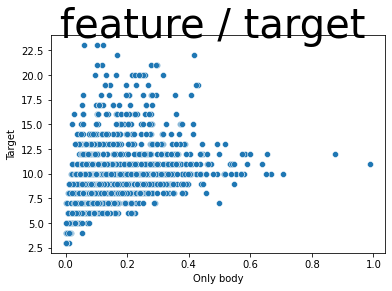

In [ ]:
plt.suptitle("feature / target", fontsize=40)


sns.scatterplot(x = 'Only body', y = 'Target', data = train)

In [ ]:
train[train["Only body"] > 0.8]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Only body
160,M,0.735,0.555,0.220,2.333,1.2395,0.3645,0.6195,12,0.8750
312,F,0.780,0.630,0.215,2.657,1.4880,0.4985,0.5860,11,0.9895


In [ ]:
train = train.drop(index = [160,312], axis = 0)
label = label.drop(index = [160,312], axis = 0)

### 전복 물

In [ ]:
Water = round(train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"]),3)
Water = round(test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"]),3)

In [ ]:
train['Water'] = Water
test['Water'] = Water

In [ ]:
train.loc[train['Water'] < 0 , 'Water'] = 0

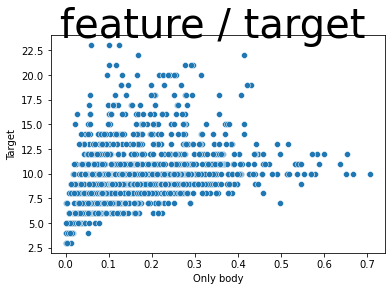

In [ ]:
plt.suptitle("feature / target", fontsize=40)


sns.scatterplot(x = 'Only body', y = 'Target', data = train)

## 데이터 전처리

In [ ]:
train = pd.get_dummies(train,columns=['Gender'])
test = pd.get_dummies(test,columns=['Gender'])

In [ ]:
train.drop(['Target'], axis=1, inplace=True)

print(train.columns.values)

['Lenght' 'Diameter' 'Height' 'Whole Weight' 'Shucked Weight'
 'Viscra Weight' 'Shell Weight' 'Only body' 'Water' 'Gender_F' 'Gender_I'
 'Gender_M']


In [ ]:
train.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Only body,Water,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0.1015,0.514,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0.0950,0.291,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0.2765,0.025,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0.2215,0.317,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0.0170,0.290,0,1,0


## 데이터 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTENC

# 모델설정
sm = SMOTENC(random_state=42,categorical_features=[0,4],k_neighbors=1)

print('Bfore OverSampling, the shape of train_X: {}'.format(train.shape))
print('Befor OverSampling, the shape of train_y: {} \n'.format(label.shape))

# train데이터를 넣어 복제함
train_re, label_re = sm.fit_resample(train,label)

print('After OverSampling, the shape of train_X: {}'.format(train_re.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(label_re.shape))

Bfore OverSampling, the shape of train_X: (1243, 12)
Befor OverSampling, the shape of train_y: (1243,) 

After OverSampling, the shape of train_X: (4242, 12)
After OverSampling, the shape of train_y: (4242,) 



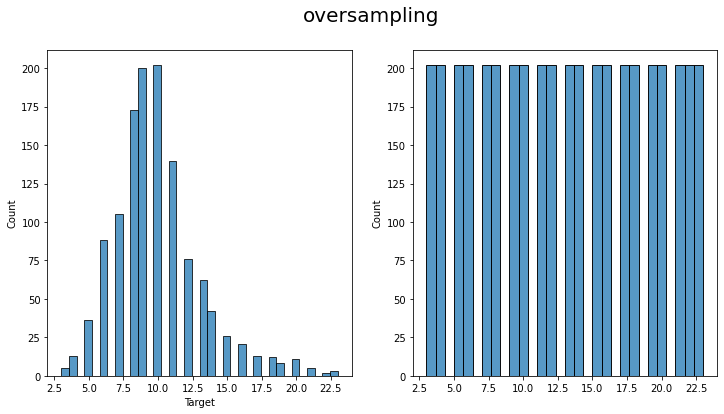

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

plt.suptitle("oversampling", fontsize=20)

sns.histplot(label,ax=ax[0])

sns.histplot(label_re,bins=30)

In [ ]:
draw = pd.concat([train_re,label_re],axis=1)

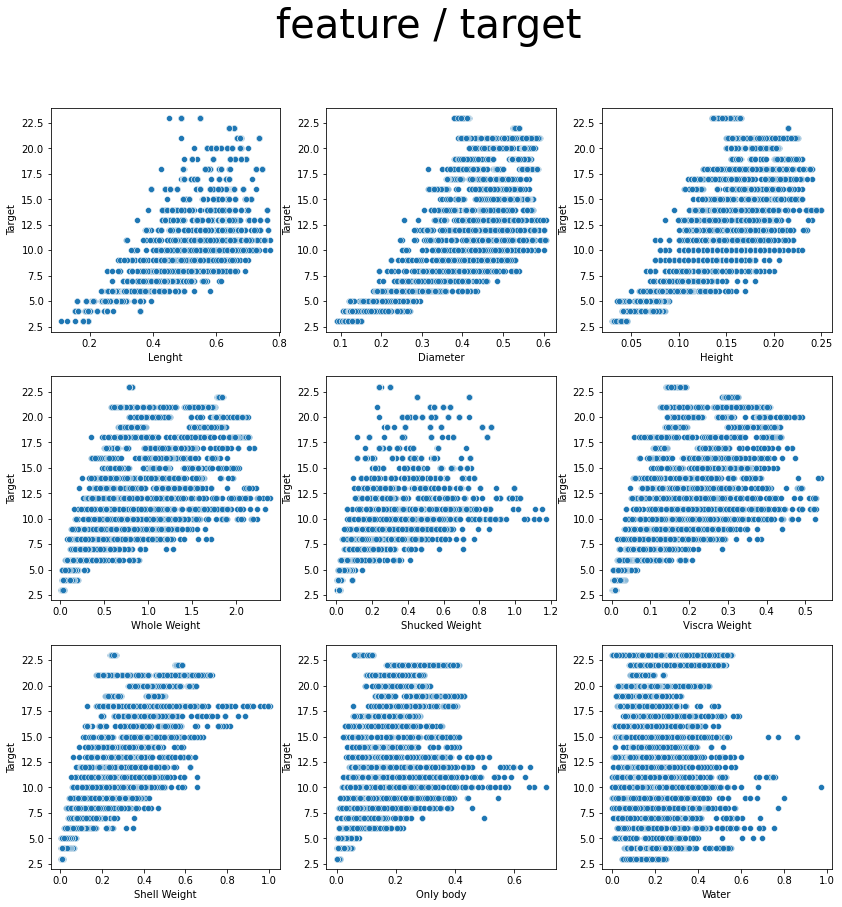

In [ ]:

fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight","Only body", "Water"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        # sns.violinplot(x = xstr, y = 'Target', data = train)
        continue
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = draw, ax = (ax[yvalue][xvalue]))
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

<br/>

# 학습 데이터 만들기
- - -

In [ ]:
label_re = label
train_re = train

In [ ]:
label_re = label_re / 29

In [ ]:
#data shuffle
from sklearn.utils import shuffle

train_re, label_re = shuffle(train_re, label_re, random_state = 3)

In [ ]:
n = round((len(train_re)*0.7))

x_train = train_re[:n]
y_train = label_re[:n]

x_val = train_re[n:]
y_val = label_re[n:]


# train_re = train_re.values
# label_re = label_re.values

# x_train = x_train.values
# y_train = y_train.values

# x_val = x_val.values
# y_val = y_val.values


In [ ]:
print(f'x_train shape => {x_train.shape}     y_train shape =>{y_train.shape}')
print(f'x_val shape => {x_val.shape}     y_val shape =>{y_val.shape}')
print(f'test shape => {test.shape}')

x_train shape => (2969, 12)     y_train shape =>(2969,)
x_val shape => (1273, 12)     y_val shape =>(1273,)
test shape => (2924, 12)


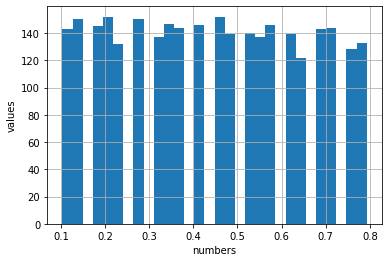

In [ ]:
plt.hist(y_train,bins=30,alpha=1)
plt.xlabel('numbers')
plt.ylabel('values')
plt.grid(True)

<br/>

# 모델 정의
- - -

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
def bangdoon(input_shape):
    initializer = initializers.HeNormal()
    
    input = Input(shape=input_shape)

    model = Dense(units=16, activation='relu')(input)
    model = Dropout(0.25)(model)
    model = Dense(units=16, activation='relu')(input)
    model = Dropout(0.25)(model)
    output = Dense(units=1, activation='sigmoid')(model) # 0~1 
    model = Model(inputs=input, outputs=output)

    return model

In [ ]:
import tensorflow_addons as tfa

model = bangdoon(x_train.shape[1:])
#opt = tfa.optimizers.RectifiedAdam(learning_rate=0.0001)
#opt = Adam(learning_rate=0.001)
#opt = SGD(learning_rate=0.0005, decay = 0.000001, momentum = 0.9, nesterov= True)
opt = Nadam(learning_rate=0.001)
#opt = SGD(learning_rate=0.001,momentum = 0.9, nesterov= True)
model.compile(loss='mean_squared_error',  #mse를 쓰면 영향력이 적은 특징들에 제곱을 주어 0에 가깝게 만들어줌
             optimizer=opt,
             #metrics=['mae']
             )  

model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_44 (Dense)            (None, 16)                208       
                                                                 
 dropout_31 (Dropout)        (None, 16)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 자동 중단 설정
my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')
#my_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, mode='min')

history = model.fit(
    #x=train_re, y=label_re,
    x=x_train, y=y_train,
    validation_data = (x_val, y_val),
    epochs=1500,
    batch_size=20,
    verbose=1,
    callbacks = my_callback,
)


Epoch 1/1500
149/149 [==============================] - 2s 7ms/step - loss: 0.0334 - val_loss: 0.0248
Epoch 2/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0238 - val_loss: 0.0207
Epoch 3/1500
149/149 [==============================] - 1s 7ms/step - loss: 0.0218 - val_loss: 0.0195
Epoch 4/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0200 - val_loss: 0.0181
Epoch 5/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0191 - val_loss: 0.0176
Epoch 6/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0185 - val_loss: 0.0170
Epoch 7/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0175 - val_loss: 0.0166
Epoch 8/1500
149/149 [==============================] - 1s 5ms/step - loss: 0.0169 - val_loss: 0.0160
Epoch 9/1500
149/149 [==============================] - 1s 6ms/step - loss: 0.0164 - val_loss: 0.0154
Epoch 10/1500
149/149 [==============================] - 1s 6ms/step - loss: 0.016

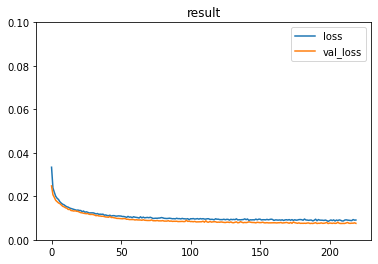

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot().set_ylim(0.0,0.1)

#pd.DataFrame(history.history)[['loss']].plot().set_ylim(0.0,0.1)
plt.title('result')
plt.show()

In [ ]:
p_test =[]
p_test_tmp = model.predict(x_val)
rmse_test = np.sqrt(np.mean(np.power(p_test_tmp.reshape(-1, ) - y_val, 2)))
print(f'model1 RMSE Test = {rmse_test}')

p_test = p_test_tmp


model1 RMSE Test = 0.08698624937549626


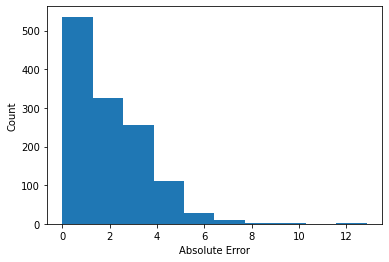

In [ ]:
# 오차정도histogram
plt.hist(np.abs(p_test.reshape(-1) - y_val)*29)
plt.xlabel('Absolute Error')
plt.ylabel('Count')



plt.show()

In [ ]:
y_test = model.predict(test)

y_test = y_test*29

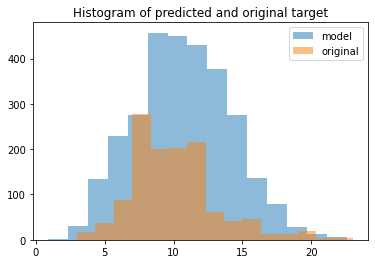

In [ ]:
# histogram of scaled target
label_fix = label
plt.hist(y_test, bins=15, label='model', alpha=0.5)
plt.hist(label_fix, bins=15, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')

plt.legend()

plt.show()

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/sample_submission.csv')
submission['Target'] = y_test
submission.to_csv('0331(relu+aug).csv', index=False)
